In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor


In [2]:
# Load training data
train_data = pd.read_csv("train.csv")

# Load testing data
test_data = pd.read_csv("test.csv")

train_data.head()


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
# Extract features (X) and target (y) from the training data
X = train_data.drop(columns=['ID', 'medv'])  # Drop 'ID' and 'medv' (target) columns
y = train_data['medv']  # Target variable

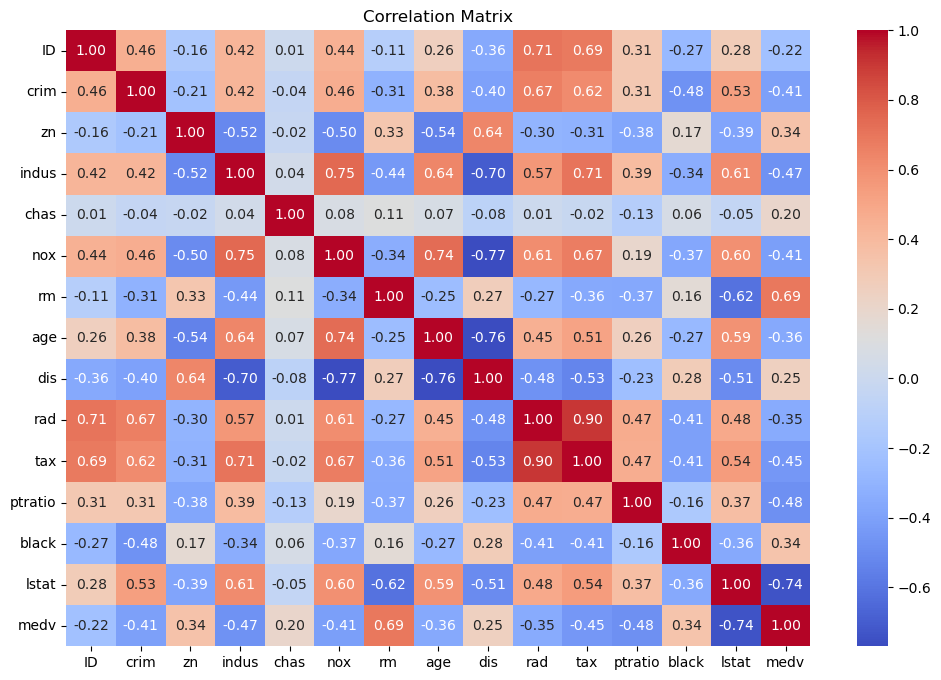

In [4]:
plt.figure(figsize=(12, 8))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [5]:
X_test = test_data.drop(columns=['ID'], errors='ignore')  # Drop 'ID' column

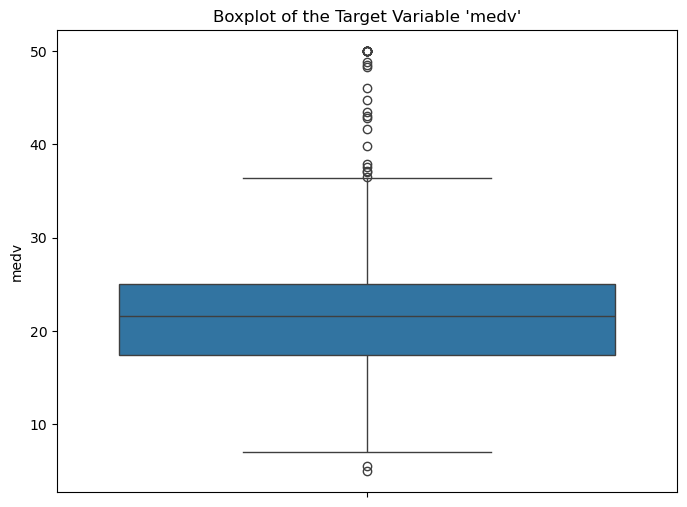

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(train_data['medv'])
plt.title("Boxplot of the Target Variable 'medv'")
plt.show()

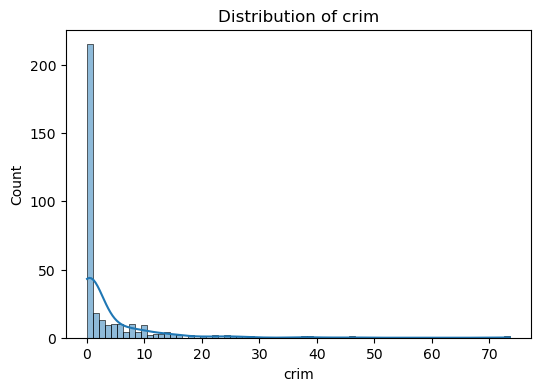

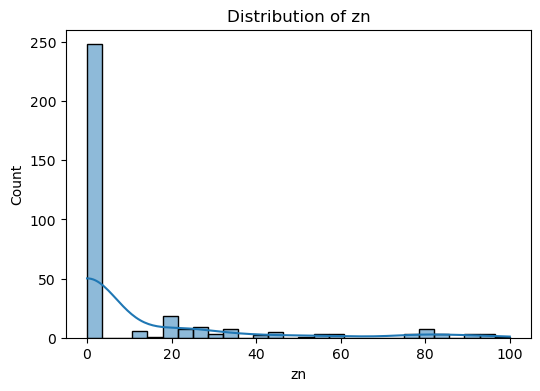

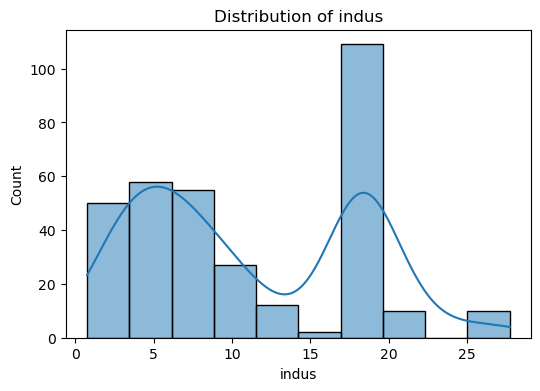

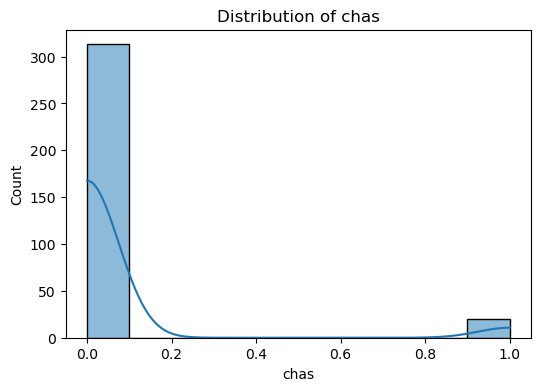

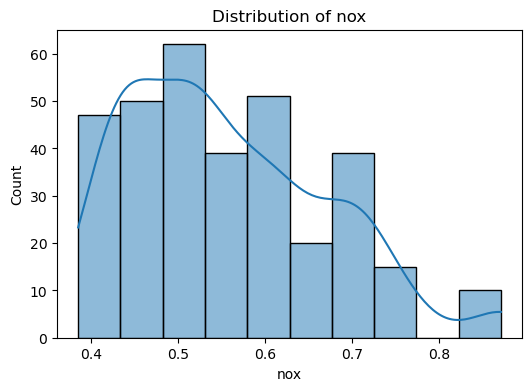

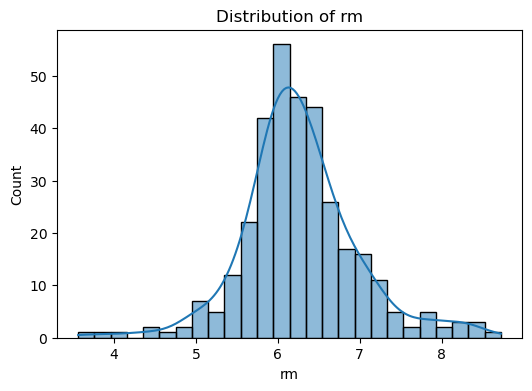

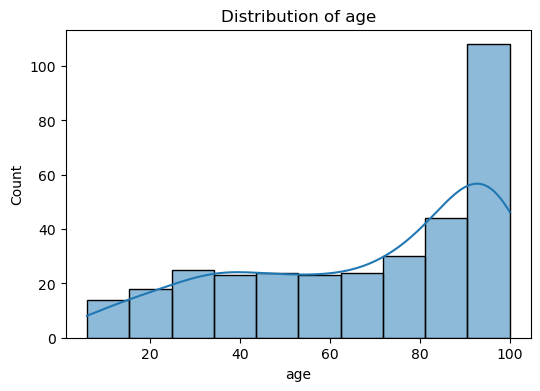

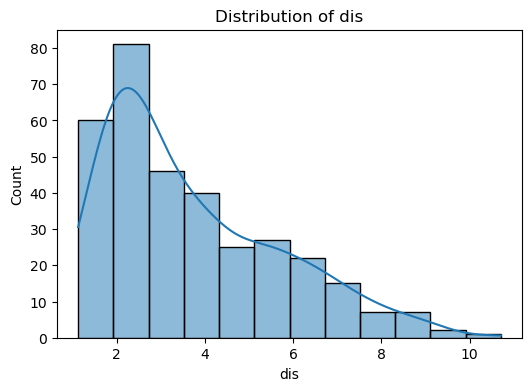

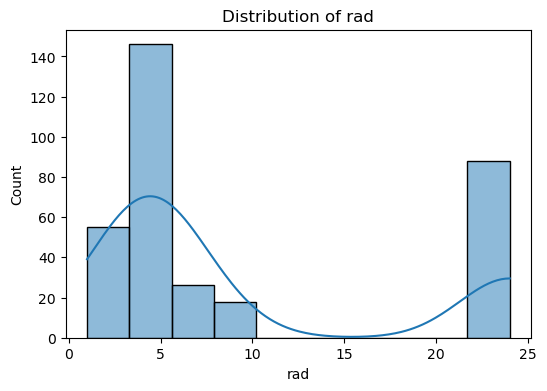

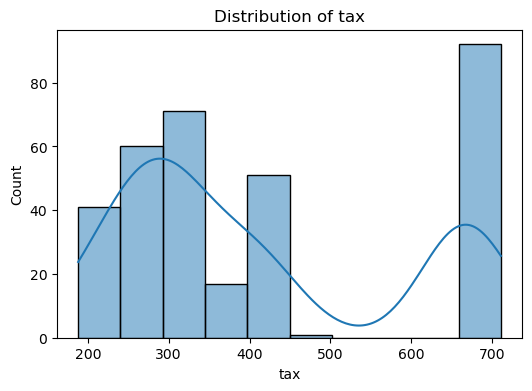

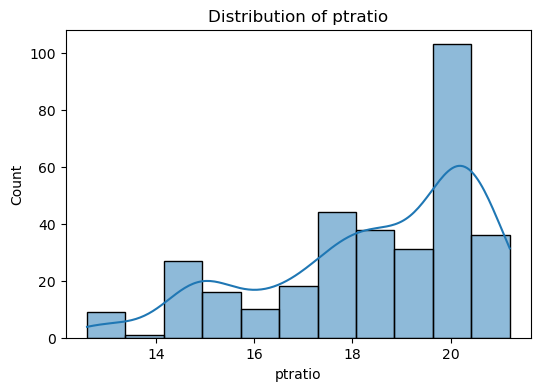

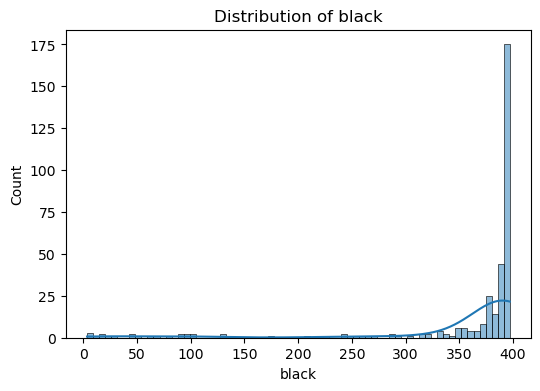

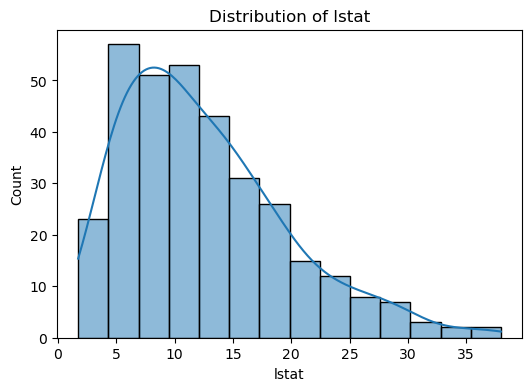

In [7]:
for column in X.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(X[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

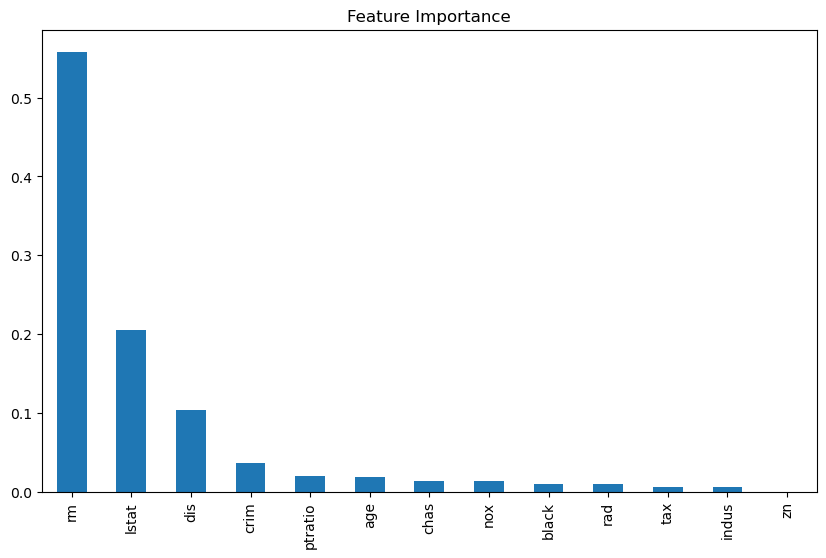

In [11]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title="Feature Importance")
plt.show()

In [12]:
# Polynomial Features
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train_scaled)
X_valid_poly = poly.transform(X_valid_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [13]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
}


In [14]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mse = mean_squared_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)
    return mse, r2


In [15]:
# Evaluate models
for name, model in models.items():
    print(f"Evaluating {name}...")
    
    if name in ['Ridge Regression', 'Lasso Regression']:
        # For regularized models, use polynomial features
        mse, r2 = evaluate_model(model, X_train_poly, y_train, X_valid_poly, y_valid)
    else:
        mse, r2 = evaluate_model(model, X_train_scaled, y_train, X_valid_scaled, y_valid)
    
    print(f"{name} - MSE: {mse}, R2 Score: {r2}")

Evaluating Linear Regression...
Linear Regression - MSE: 23.486735195425798, R2 Score: 0.739031586042544
Evaluating Ridge Regression...
Ridge Regression - MSE: 19.335471599647523, R2 Score: 0.7851575659837907
Evaluating Lasso Regression...
Lasso Regression - MSE: 16.666883864120322, R2 Score: 0.8148090736561932
Evaluating Random Forest...
Random Forest - MSE: 8.115971761194029, R2 Score: 0.9098209154819099


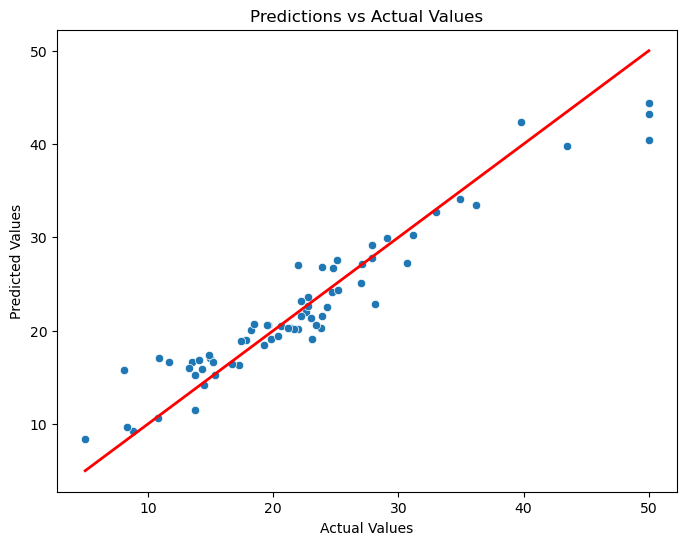

In [16]:
# Visualizing the model's predictions vs actual values
y_pred = model.predict(X_valid_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_valid, y=y_pred)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', lw=2)
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()